## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## BUSINESS UNDERSTANDING

### Explaining the situation before hand

#### Explain what the need of the comapany
#### Name of stakeholder Group 3.3 COME UP WITH STAKEHOLDER NAME
A real estate agency from King County, Seattle hired us for a project to analyse how different factors affect prices of homes.The aim of this analysis is to build a multiple linear regression model that predicts the prices of houses in King County, Seattle.

As a data scientist analyzing the King County housing market, my business understanding is that the real estate industry is a crucial sector that plays a significant role in the economy. The success of a real estate transaction depends on several factors, including the location, the size of the property, the condition of the property, the amenities, and the current market conditions. The housing market is subject to various external factors such as interest rates, economic conditions, and government policies that can impact the demand and supply of properties.

### Datasets
The dataset contains information about the houses in King County, Seattle. The dataset has 21 variables including the price, number of bedrooms, bathrooms, square footage of the living area, and other variables. The dataset contains 21,597 
observations. 

### Explaining how we will deal with data
The scope of this analysis is limited to the data provided. We will use feature engineering techniques such as imputation, normalization, and one-hot encoding to preprocess the data. We will use multiple linear regression model. We will evaluate the performance of the model using metrics such as mean squared error, mean absolute error, and R-squared.

#### Explaining how we deal with the limitations of the data
To overcome these challenges, we need to use a combination of quantitative and qualitative analysis techniques and incorporate domain knowledge and expertise. By understanding the King County housing market's complexities and using data-driven insights, we can help real estate agents and property owners make informed decisions about pricing, marketing, and selling their properties, ultimately leading to more successful real estate transactions and a more robust housing market.

## BUSINESS PROBLEM

By developing a model that can accurately predict the sale price of houses, real estate agents can better advise their clients on pricing strategies, investors can identify potentially undervalued properties, and homeowners can better estimate the value of their own properties. This can ultimately lead to more efficient and profitable real estate transactions in King County.

You are charged with exploring what factors most significantly affect home prices. You must then translate those findings into actionable insights that the real estate agency can use to help decide what factors to consider when advising potential home buyers.

## Business Objecives

#### Examples
1. Identify the key housing features that significantly impact home prices in the King County housing market, Seattle.
2. "Developing a multiple linear regression model to analyze the impact of various housing features on home prices in the King County housing market, Seattle, to provide actionable insights to real estate agents and property owners for informed decision making regarding pricing and marketing strategies."
##### Season
3. Investigate whether homes sell for higher prices in certain seasons, or whether certain types of homes are more popular in certain seasons.
#### Size
Investigate whether homes sell for higher prices in certain seasons, or whether certain types of homes are more popular in certain seasons.
#### Conditions
Investigate whether homes sell for higher prices in certain seasons, or whether certain types of homes are more popular in certain seasons.

#### Can input things we were interested in

#### Chat answers

Identify which features are most correlated with each other. For example, does the number of bedrooms tend to be positively correlated with the square footage of a house?
*We removed the most correlated so the ones that remain*

Predict the sale price of a house based on its features, using techniques such as linear regression, decision trees, or random forests.



Explore whether there are any temporal patterns in the data, such as seasonal trends or changes over time in median sale prices.

investigate whether homes sell for higher prices in certain seasons, or whether certain types of homes are more popular in certain seasons.

"Developing a multiple linear regression model to analyze the impact of various housing features on home prices in the King County housing market, Seattle, to provide actionable insights to real estate agents and property owners for informed decision making regarding pricing and marketing strategies."



In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
import numpy as np
import pandas as pd
pd.options.display.max_columns = 30
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error

# Group Libraries
import Functions as fun

## DATA UNDERSTANDING:



In this project, we are analyzing the King County housing market to build a multiple linear regression model that predicts the prices of houses in King County, Seattle.

In [2]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
house_df=pd.read_csv('kc_house_data.csv')
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
#Getting data information
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

The dataset provided contains information on 21,597 houses in King County, Seattle. 

To better understand the data, we identified the categorical and numerical variables in the dataset that is relevant to our business problema s shown below:

- **Numerical Columns (15)** 
  
  `date` - Date house was sold

  `price` - Sale price (prediction target)

  `bedrooms` - Number of bedrooms

  `bathrooms` - Number of bathrooms

  `sqft_living` - Square footage of living space in the home

  `sqft_lot` - Square footage of the lot

  `floors` - Number of floors (levels) in house

  `sqft_above` - Square footage of house apart from basement

  `sqft_basement` - Square footage of the basement

  `yr_built` - Year when house was built

  `yr_renovated` - Year when house was renovated

  `lat` - Latitude coordinate

  `long` - Longitude coordinate

  `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
  
  `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors

- **Categorical Columns (6)**

  `id` - Unique ID for each home sold

  `waterfront` - Whether the house has a view to a waterfront

  `view` - An index from 0 to 4 of how good the view of the property was

  `condition` - An index from 1 to 5 on the condition of the house

  `grade` - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design

  `zipcode` - What zipcode area the house is in

We chose these columns because they are key features that are often used to determine the value of a residential property in real estate.

The purpose of this exercise is to analyze and comprehend the information contained within the columns of the provided CSV file. Our aim is to carefully examine the data, identify patterns and correlations between the variables, and extract meaningful insights from it.



In [4]:
# ### NUMERICAL VARIABLES: 


# "Living area" (sqft_living) is a measure of the total interior living space of the property, which is a key factor in determining its value.
# "Bedrooms" and "bathrooms" are important because they directly affect the functional capacity of the house, which is an important consideration for prospective buyers.
# "Location" (zipcode) is a critical factor because different zip codes have different levels of desirability and attractiveness to buyers, and this can significantly affect the value of the property.
# "Age" (yr_built) is important because it provides an indication of the property's overall condition and potential maintenance costs, which can also impact its value.

# Categorical variables:

# Condition: The condition variable describes the overall condition of the house, which is related to maintenance.This variable can help to identify how the condition of a house affects its price. It has five categories, ranging from 1 to 5, with 1 being the poorest condition and 5 being the best. The condition variable is a categorical variable as it has a limited number of values and cannot be measured quantitatively.

In [5]:
# View a summary of the data frame
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
# Calculate the basic statistical summary
house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Data Cleaning
#### Detecting missing values

We will now visualize our missing data.

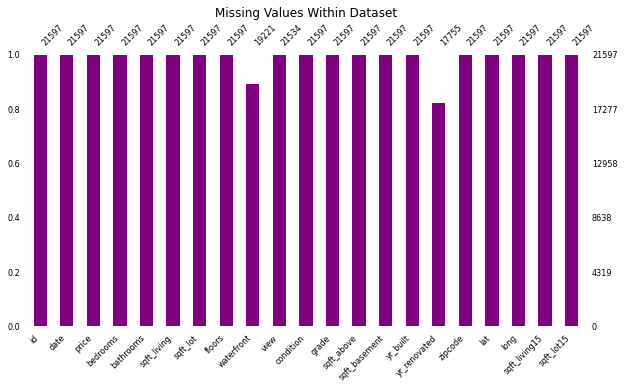

In [7]:
# Visualise the missing values in the dataset
msno.bar(house_df, color='purple', figsize=(10, 5), fontsize=8)
plt.title('Missing Values Within Dataset');

In [8]:
house_df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

From the above bar graph, we can see that there exist missing data in waterfront, view and the year renovated.

We shall replace missing values of waterfront, view with mode and the year renovated with the median.

In [9]:
fun.fun_mode_fill_null(house_df, 'waterfront')
fun.fun_mode_fill_null(house_df, 'view')
fun.fun_median_fill_null(house_df, 'yr_renovated')
house_df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [10]:
# ### Detecting duplicates
# fun.fun_count_duplicates(house_df, 'id')

In [11]:
# Check for duplicates in the 'id' column
house_df.id.duplicated().sum()

177

There are 177 duplivates in the unique column data. We will use this to eliminate all duplicates with the same id.

In [12]:
fun.fun_duplicates_drop(house_df, 'id')
house_df.id.duplicated().sum()

0

In [13]:
house_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

### Detecting outliers

We shall be checking for outliers in the columns of innterest


In [14]:
def fun_outlier_plot_box(df, column_name):
    """
    Create a box plot for a specified column of a Pandas DataFrame using Seaborn.

    Parameters:
        df (pandas.DataFrame): The DataFrame containing the column to plot.
        column_name (str): The name of the column to plot.

    Returns:
        None
    """
    sns.boxplot(x=df[column_name])

In [15]:
def replace_outliers_with_mode(df, columns):
    """
    This function detects outliers in the specified columns of a DataFrame and replaces them with the mode of the column.

    Parameters:
        df (pandas.DataFrame): The DataFrame to modify.
        columns (list): A list of column names to check for outliers.

    Returns:
        pandas.DataFrame: The modified DataFrame with outliers replaced by mode.
    """
    for col in columns:
        q1 = df[col].quantile(0.005)
        q3 = df[col].quantile(0.995)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        mode = df[col].mode()[0]
        df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = mode
    
    outliers = {}
    for col in columns:
        q1 = df[col].quantile(0.005)
        q3 = df[col].quantile(0.995)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        col_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers[col] = len(col_outliers)
    
    print("Total number of outliers replaced with mode:")
    print(outliers)
    
    return df

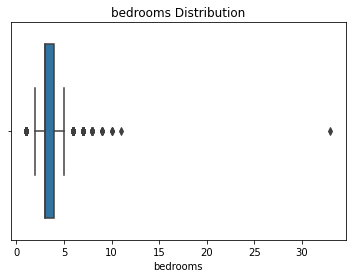

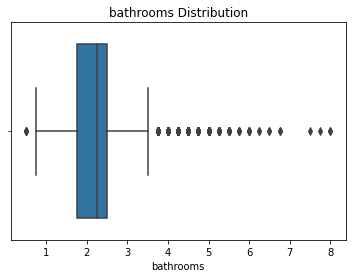

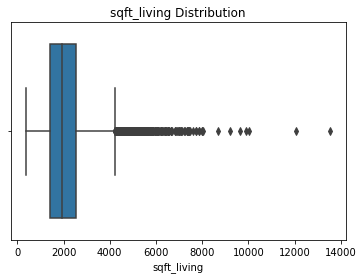

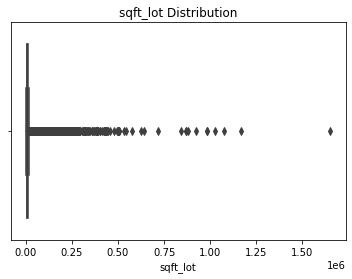

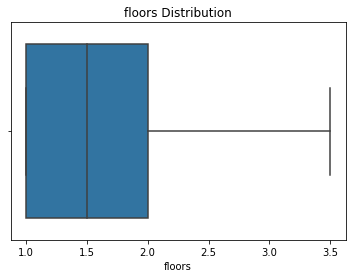

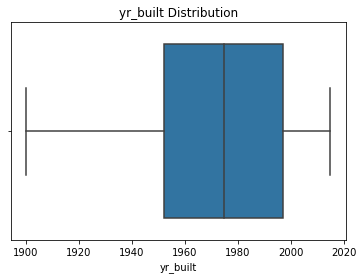

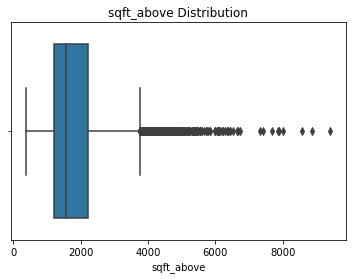

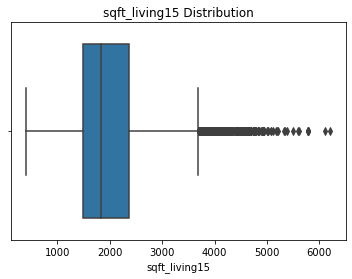

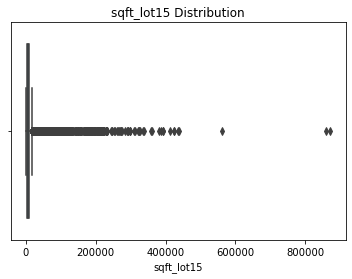

In [16]:
columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'yr_built', 'sqft_above', 'sqft_living15', 'sqft_lot15']
# iterate through the columns of house_df and call fun_outlier_plot_box()
for column in columns:
    fun_outlier_plot_box(house_df, column)
    plt.title(f"{column} Distribution")
    plt.show()

In [17]:
# print out the total number of outliers replaced with mode for each column. 
columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'yr_built', 'sqft_above', 'sqft_living15', 'sqft_lot15']
house_df = replace_outliers_with_mode(house_df, columns)

Total number of outliers replaced with mode:
{'bedrooms': 0, 'bathrooms': 0, 'sqft_living': 0, 'sqft_lot': 0, 'floors': 0, 'yr_built': 0, 'sqft_above': 0, 'sqft_living15': 0, 'sqft_lot15': 0}


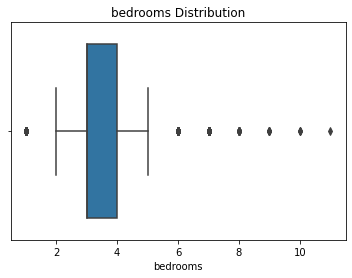

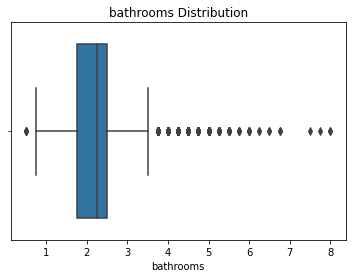

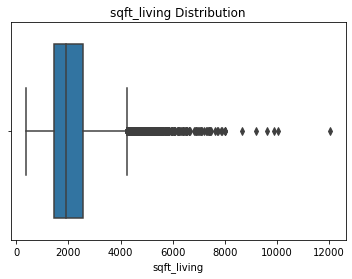

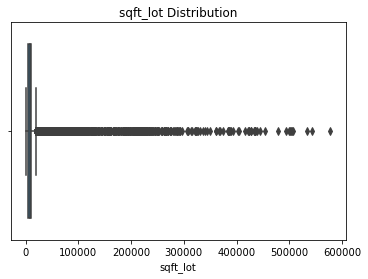

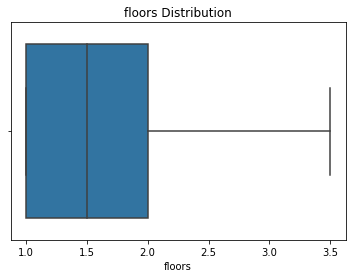

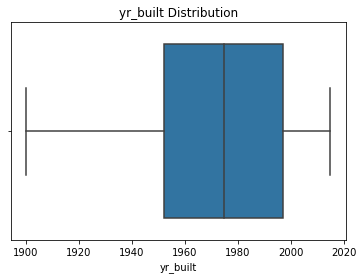

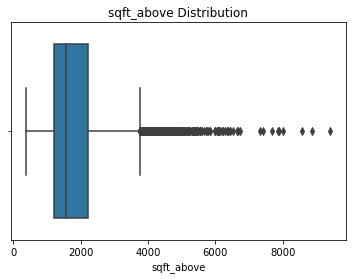

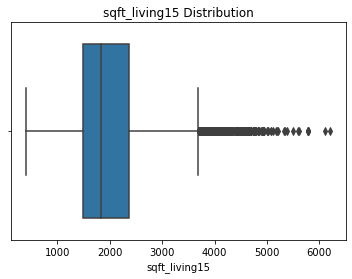

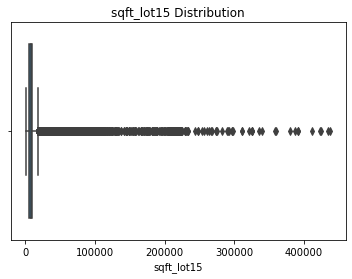

In [18]:
# iterate through the columns of house_df and call fun_outlier_plot_box()
for column in columns:
    fun_outlier_plot_box(house_df, column)
    plt.title(f"{column} Distribution")
    plt.show()

### Univariate Analysis
In this section, we'll explore each column in the dataset to see the distributions of features and obtain some useful insights. The main two parts in this section are: 
>   - Categorical Columns
>   - Numerical Columns

#### 2.1.1 Categorical Columns

There are 5 Categorical Columns in the dataset that we shall be analysing:

- `id`

- `waterfront`

- `view`

- `condition`

- `grade`

- `zipcode`

In [19]:
def fun_plot_value_counts(df, col, title):
    '''
    Returns the value counts of a column in a dataframe and
    plots the value counts of a column in a dataframe as a bar chart
    '''
    counts = df[col].value_counts(dropna=False)
    print(counts)
    counts.plot(kind='bar', figsize=(10, 5), color='lightgreen', edgecolor='black')
    plt.title(title)
    plt.xticks(rotation=0)
    plt.show()
    return counts

NO     21274
YES      146
Name: waterfront, dtype: int64


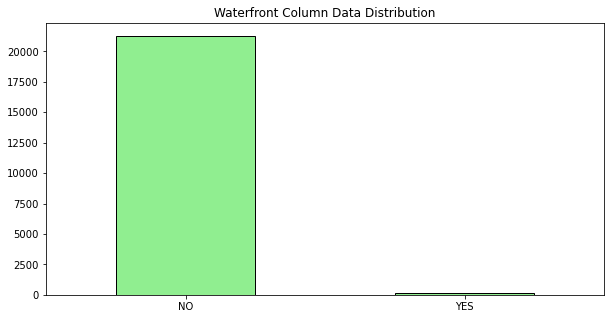

NO     21274
YES      146
Name: waterfront, dtype: int64

In [20]:
fun_plot_value_counts(house_df, 'waterfront', 'Waterfront Column Data Distribution')

NONE         19316
AVERAGE        956
GOOD           505
FAIR           329
EXCELLENT      314
Name: view, dtype: int64


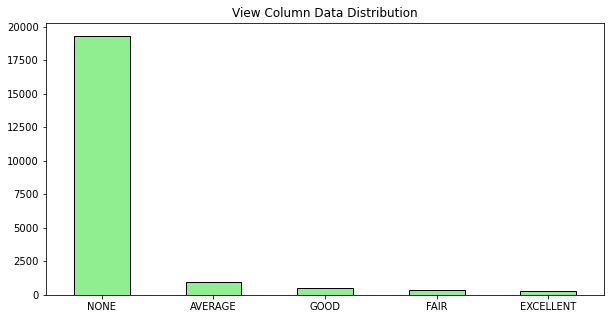

NONE         19316
AVERAGE        956
GOOD           505
FAIR           329
EXCELLENT      314
Name: view, dtype: int64

In [21]:

fun_plot_value_counts(house_df, 'view', 'View Column Data Distribution')

Average      13900
Good          5643
Very Good     1687
Fair           162
Poor            28
Name: condition, dtype: int64


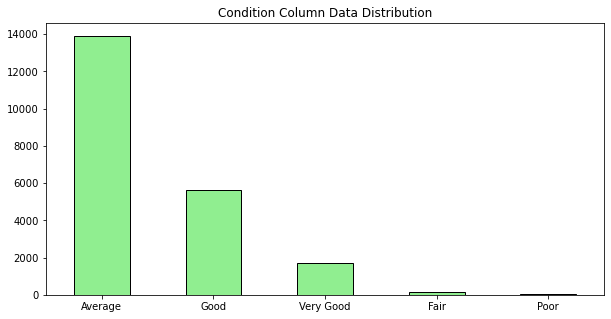

Average      13900
Good          5643
Very Good     1687
Fair           162
Poor            28
Name: condition, dtype: int64

In [22]:

fun_plot_value_counts(house_df, 'condition', 'Condition Column Data Distribution')

7 Average        8889
8 Good           6041
9 Better         2606
6 Low Average    1995
10 Very Good     1130
11 Excellent      396
5 Fair            234
12 Luxury          88
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64


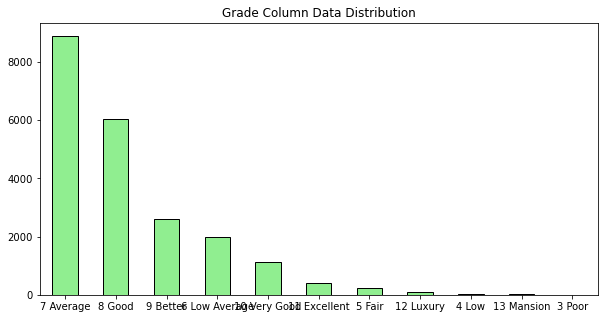

7 Average        8889
8 Good           6041
9 Better         2606
6 Low Average    1995
10 Very Good     1130
11 Excellent      396
5 Fair            234
12 Luxury          88
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [23]:

fun_plot_value_counts(house_df, 'grade', 'Grade Column Data Distribution')

98103    600
98038    586
98115    576
98052    571
98117    548
        ... 
98102    104
98010     99
98024     79
98148     56
98039     49
Name: zipcode, Length: 70, dtype: int64


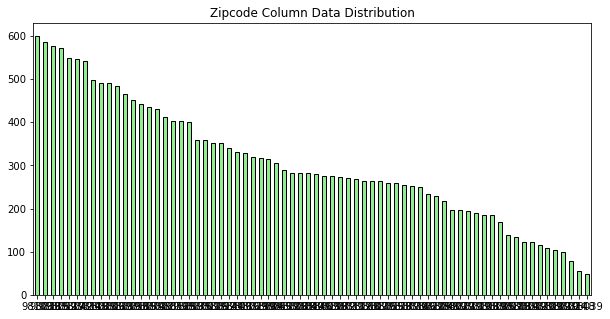

98103    600
98038    586
98115    576
98052    571
98117    548
        ... 
98102    104
98010     99
98024     79
98148     56
98039     49
Name: zipcode, Length: 70, dtype: int64

In [24]:

fun_plot_value_counts(house_df, 'zipcode', 'Zipcode Column Data Distribution')

####  Numerical Columns

There are 15 Numerical Columns in the dataset that we shall be analysing:

- `date`

- `price`
  
- `bedrooms`
  
- `bathrooms`
  
- `sqft_living`
  
- `sqft_lot`

- `floors`
  
- `sqft_above`
  
- `sqft_basement`
  
- `yr_built`
  
- `yr_renovated`
  
- `lat`
  
- `long`
  
- `sqft_living15`
  
- `sqft_lot15`

In [25]:
def fun_describe_and_plot_distribution(df, col, title):
    '''
    Returns the statistics of a column in a dataframe and
    plots the distribution of a column in a dataframe as a histogram, kde, and boxplot
    '''
    # print the statistics
    print(df[col].describe())

    # create a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(10, 5))

    # assign a graph to each ax
    sns.boxplot(df[col], ax=ax_box, color='lightgreen')
    sns.histplot(data=df, x=col, ax=ax_hist, kde=True, color='lightgreen', bins='auto', edgecolor='black')

    # set the title and layout
    plt.suptitle(title)
    plt.tight_layout()

    # show the plot
    plt.show()

In [26]:
# fun_describe_and_plot_distribution(house_df, 'date', 'Date Column Data Distribution')

count    2.142000e+04
mean     5.407393e+05
std      3.679311e+05
min      7.800000e+04
25%      3.225000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


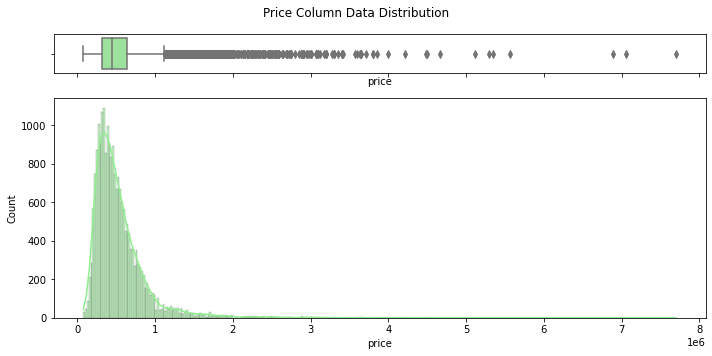

In [27]:
fun_describe_and_plot_distribution(house_df, 'price', 'Price Column Data Distribution')

count    21420.000000
mean         3.372549
std          0.902995
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         11.000000
Name: bedrooms, dtype: float64


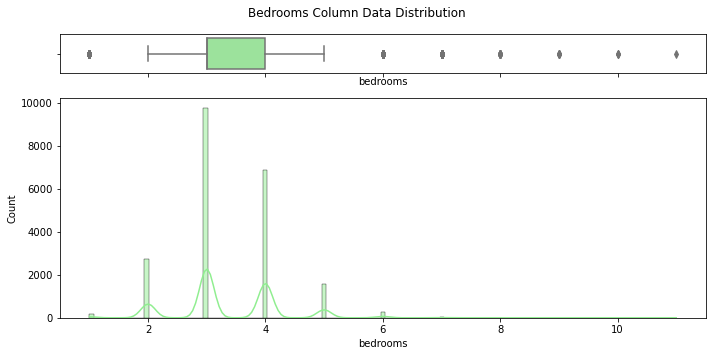

In [28]:
fun_describe_and_plot_distribution(house_df, 'bedrooms', 'Bedrooms Column Data Distribution')

count    21420.000000
mean         2.118429
std          0.768720
min          0.500000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64


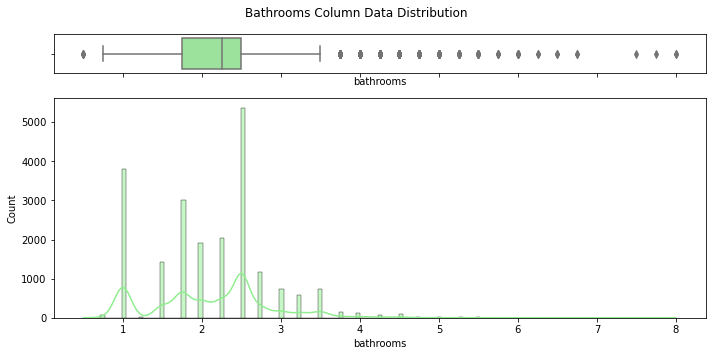

In [29]:
fun_describe_and_plot_distribution(house_df, 'bathrooms', 'Bathrooms Column Data Distribution')

count    21420.000000
mean      2082.561204
std        915.482938
min        370.000000
25%       1430.000000
50%       1920.000000
75%       2550.000000
max      12050.000000
Name: sqft_living, dtype: float64


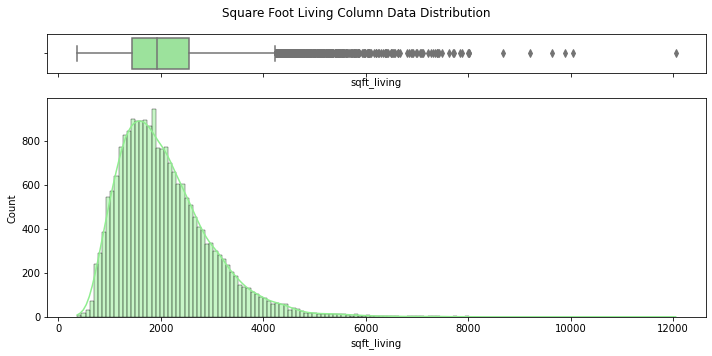

In [30]:
fun_describe_and_plot_distribution(house_df, 'sqft_living', 'Square Foot Living Column Data Distribution')

count    21420.000000
mean      1988.384080
std        685.537057
min        399.000000
25%       1490.000000
50%       1840.000000
75%       2370.000000
max       6210.000000
Name: sqft_living15, dtype: float64


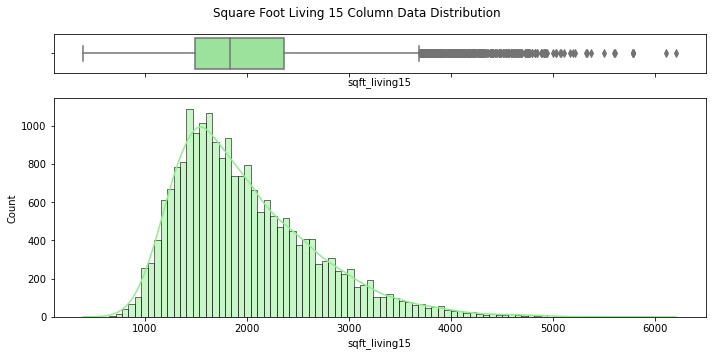

In [31]:
fun_describe_and_plot_distribution(house_df, 'sqft_living15', 'Square Foot Living 15 Column Data Distribution')

count     21420.000000
mean      14512.810504
std       33439.663853
min         520.000000
25%        5038.000000
50%        7605.000000
75%       10660.250000
max      577605.000000
Name: sqft_lot, dtype: float64


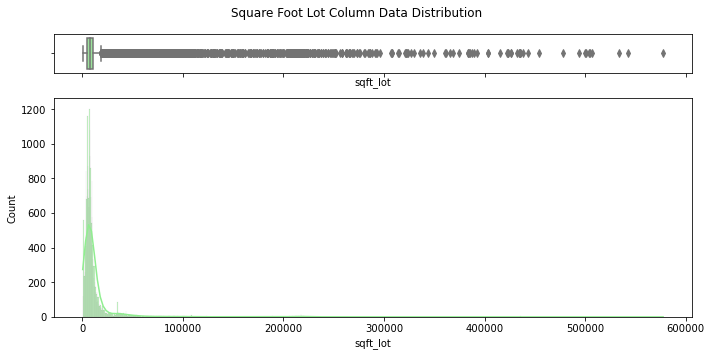

In [32]:
fun_describe_and_plot_distribution(house_df, 'sqft_lot', 'Square Foot Lot Column Data Distribution')

count     21420.000000
mean      12669.511391
std       25806.976744
min         651.000000
25%        5100.000000
50%        7620.000000
75%       10083.000000
max      438213.000000
Name: sqft_lot15, dtype: float64


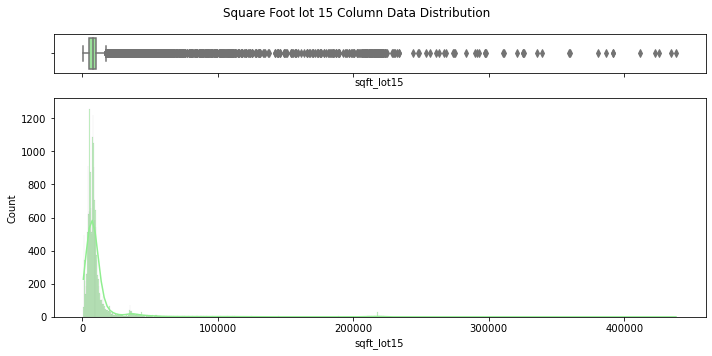

In [33]:
fun_describe_and_plot_distribution(house_df, 'sqft_lot15', 'Square Foot lot 15 Column Data Distribution')

count    21420.000000
mean      1791.170215
std        828.692965
min        370.000000
25%       1200.000000
50%       1560.000000
75%       2220.000000
max       9410.000000
Name: sqft_above, dtype: float64


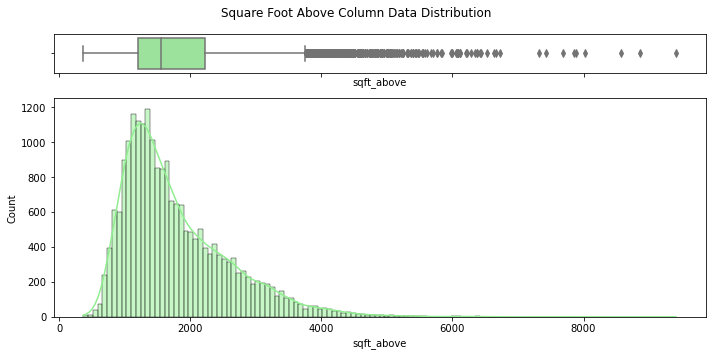

In [34]:
fun_describe_and_plot_distribution(house_df, 'sqft_above', 'Square Foot Above Column Data Distribution')

In [35]:
# fun_describe_and_plot_distribution(house_df, 'sqft_basement', 'Square Foot Basement Column Data Distribution')

count    21420.000000
mean         1.495985
std          0.540081
min          1.000000
25%          1.000000
50%          1.500000
75%          2.000000
max          3.500000
Name: floors, dtype: float64


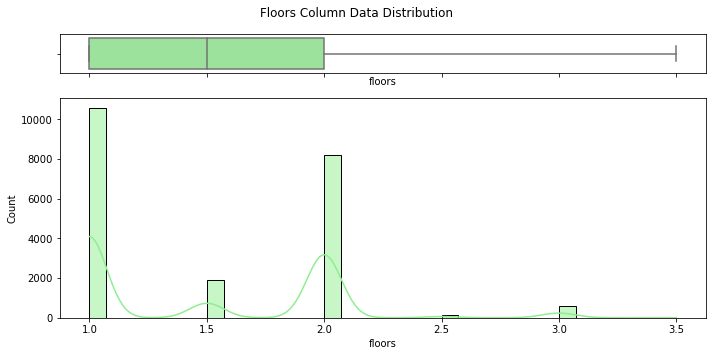

In [36]:
fun_describe_and_plot_distribution(house_df, 'floors', 'Floors Column Data Distribution')

count    21420.000000
mean      1971.092997
std         29.387141
min       1900.000000
25%       1952.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64


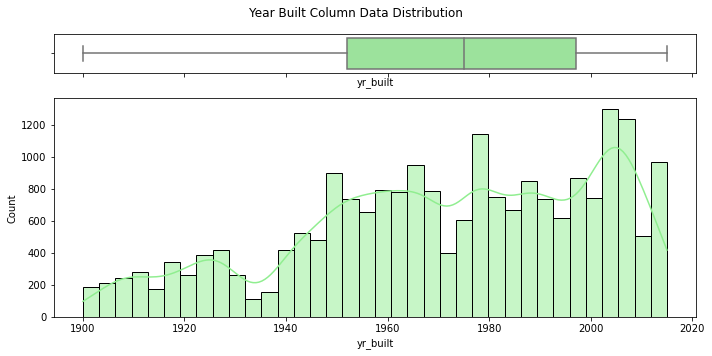

In [37]:
fun_describe_and_plot_distribution(house_df, 'yr_built', 'Year Built Column Data Distribution')

count    21420.000000
mean        68.956723
std        364.552298
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64


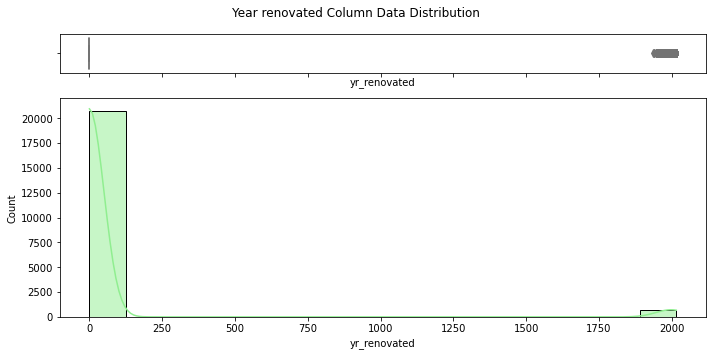

In [38]:
fun_describe_and_plot_distribution(house_df, 'yr_renovated', 'Year renovated Column Data Distribution')

count    21420.000000
mean        47.560197
std          0.138589
min         47.155900
25%         47.471200
50%         47.572100
75%         47.678100
max         47.777600
Name: lat, dtype: float64


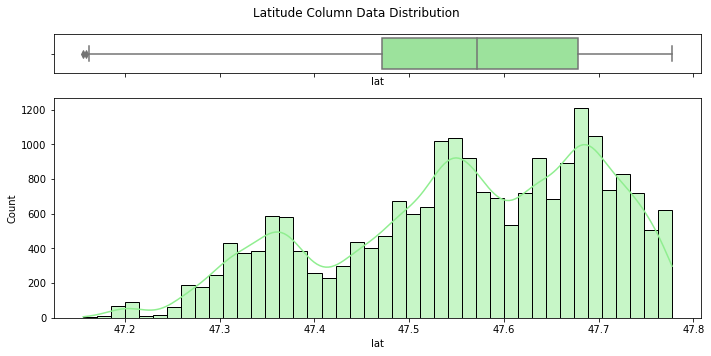

In [39]:
fun_describe_and_plot_distribution(house_df, 'lat', 'Latitude Column Data Distribution')

count    21420.000000
mean      -122.213784
std          0.140791
min       -122.519000
25%       -122.328000
50%       -122.230000
75%       -122.125000
max       -121.315000
Name: long, dtype: float64


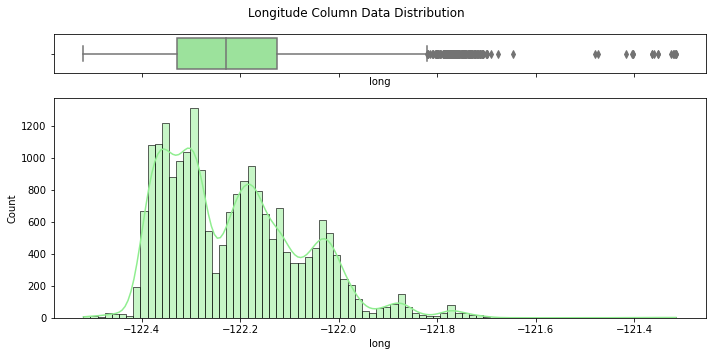

In [40]:
fun_describe_and_plot_distribution(house_df, 'long', 'Longitude Column Data Distribution')

### Construct Data

We shall now create new columns from the existing ones

Use the date feature to create a new feature called season, which represents whether the home was sold in Spring, Summer, Fall, or Winter.

In [41]:
#To create a new feature called "season" in the King County housing dataset,
#we can extract the month information from the "date" column and map it to 
#the corresponding season.

# Convert the date column to a datetime object
house_df['date'] = pd.to_datetime(house_df['date'])

# Extract the month information and map it to the corresponding season
seasons = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring',
           6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall',
           11: 'Fall', 12: 'Winter'}
house_df['season'] = house_df['date'].dt.month.map(seasons)


With the new "season" feature, we can now analyze the King County housing dataset with respect to the season and identify any seasonality trends in 
the housing market. For example, we can investigate whether homes sell for 
higher prices in certain seasons, or whether certain types of homes are more 
popular in certain seasons.

### adding a column to store the age of the houses

In [42]:
# Add house_age column
house_df['age'] = house_df['date'].dt.year - house_df['yr_built']

### removing null values in the 'yr_built" column and adding the 'renovated' column to show whether the house has been renovated or not

In [43]:
house_df['renovated'] = house_df['yr_renovated'].apply(lambda x: 0 if x == 0 else 1)


### Add has_basement column that is a binary value

In [44]:
house_df['sqft_basement'] = house_df['sqft_basement'].replace('?', '0').astype('float')
house_df['has_basement'] = house_df['sqft_basement'].apply(lambda x: 0 if x == 0 else 1)


In [45]:
season = house_df['season']

In [46]:
house_df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,season,age,renovated,has_basement
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NO,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,Fall,59,0,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,Winter,63,1,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,Winter,82,0,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,Winter,49,0,1
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,Winter,28,0,0


### Ordinal Encoding

Ordinal encoding converts each label into integer values and the encoded data represents the sequence of labels

the values in the `condition` and `grade` columns are ordinal, and have been assigned a value based on the quality of the feature. Therefore, we will be ordinal encoding these columns.

In [47]:
# Create dictionaries for mapping the ordinal numberical value
condition_dict = {'Poor': 1, 'Fair': 2, 'Average': 3, 'Good': 4, 'Very Good': 5}
grade_dict = {'3 Poor': 3, '4 Low': 4, '5 Fair': 5, '6 Low Average': 6, '7 Average': 7, '8 Good': 8, '9 Better': 9, '10 Very Good': 10, '11 Excellent': 11, '12 Luxury': 12, '13 Mansion': 13}
# Map the ordinal numerical values to the 'condition' and 'grade' columns
house_df['condition'] = house_df['condition'].map(condition_dict)
house_df['grade'] = house_df['grade'].map(grade_dict)
# Preview the dataframe
house_df[['condition', 'grade']]

,condition,grade
0,3,7
1,3,7
2,3,6
3,5,7
4,3,8
...,...,...
21592,3,8
21593,3,8
21594,3,7
21595,3,8


### One Hot Encoding

One hot encoding is a process of converting categorical data variables so they can be provided to machine learning algorithms to improve predictions.

We shall be encoding the categorical columns (`waterfront` and `view`) using one hot encoding. Furthermore, in order to avoid the "Dummy Variable Trap" (perfect multicollinearity between the independent variables), we will need to drop one of the columns created.

In [48]:
house_df.select_dtypes('object')

,waterfront,view,season
0,NO,NONE,Fall
1,NO,NONE,Winter
2,NO,NONE,Winter
3,NO,NONE,Winter
4,NO,NONE,Winter
...,...,...,...
21592,NO,NONE,Spring
21593,NO,NONE,Winter
21594,NO,NONE,Summer
21595,NO,NONE,Winter


In [49]:
house_df= pd.get_dummies(house_df, columns=['waterfront', 'view', 'season'], drop_first=False)
# Preview the dataframe
house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,...,sqft_lot15,age,renovated,has_basement,waterfront_NO,waterfront_YES,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,season_Fall,season_Spring,season_Summer,season_Winter
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0.0,1955,0.0,98178,...,5650,59,0,0,1,0,0,0,0,0,1,1,0,0,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400.0,1951,1991.0,98125,...,7639,63,1,1,1,0,0,0,0,0,1,0,0,0,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,3,6,770,0.0,1933,0.0,98028,...,8062,82,0,0,1,0,0,0,0,0,1,0,0,0,1
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910.0,1965,0.0,98136,...,5000,49,0,1,1,0,0,0,0,0,1,0,0,0,1
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0.0,1987,0.0,98074,...,7503,28,0,0,1,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,3,8,1530,0.0,2009,0.0,98103,...,1509,5,0,0,1,0,0,0,0,0,1,0,1,0,0
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,3,8,2310,0.0,2014,0.0,98146,...,7200,1,0,0,1,0,0,0,0,0,1,0,0,0,1
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,3,7,1020,0.0,2009,0.0,98144,...,2007,5,0,0,1,0,0,0,0,0,1,0,0,1,0
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,3,8,1600,0.0,2004,0.0,98027,...,1287,11,0,0,1,0,0,0,0,0,1,0,0,0,1


In the `waterfront` column, we shall be dropping the `waterfront_NO` column as the reference column. This will allow us to study the effect of having a house on a waterfront. In the `view` column, we shall be dropping the `view_NONE` column as the reference column. This will allow us to study the effect of having a house with a view. In addition, it is the most common value in the column.In the `season` column, we shall be dropping the `season_Fall` column as the reference column

In [50]:
# Drop the 'waterfront_NO' and 'view_NONE' columns
house_df.drop(['waterfront_NO', 'view_NONE', 'season_Fall'], axis=1, inplace=True)
# Preview the dataframe
house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,renovated,has_basement,waterfront_YES,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,season_Spring,season_Summer,season_Winter
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,59,0,0,0,0,0,0,0,0,0,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,63,1,1,0,0,0,0,0,0,0,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,82,0,0,0,0,0,0,0,0,0,1
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,49,0,1,0,0,0,0,0,0,0,1
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,28,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,5,0,0,0,0,0,0,0,1,0,0
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,1,0,0,0,0,0,0,0,0,0,1
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,5,0,0,0,0,0,0,0,0,1,0
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,11,0,0,0,0,0,0,0,0,0,1


## Checking correlations and multicollinearity

In [51]:
house_df.corr().head(5)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,renovated,has_basement,waterfront_YES,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,season_Spring,season_Summer,season_Winter
id,1.000000,-0.018525,0.001883,0.004343,-0.012772,-0.147247,0.018139,-0.024300,0.006470,-0.011794,-0.004999,0.021171,-0.010857,-0.007934,-0.002766,0.019336,-0.003883,-0.143110,-0.021012,-0.010864,0.002900,-0.003628,0.015031,0.016497,0.001027,-0.012658,0.012454,0.001552,-0.000054
price,-0.018525,1.000000,0.316714,0.526229,0.701474,0.092118,0.256286,0.034779,0.668020,0.605294,0.320842,0.052906,0.118484,-0.052371,0.305744,0.020983,0.584549,0.080538,-0.052828,0.118179,0.177593,0.264898,0.147497,0.302693,0.092720,0.182488,0.023218,0.010247,-0.025421
bedrooms,0.001883,0.316714,1.000000,0.528917,0.593872,0.042097,0.183570,0.022743,0.367750,0.493566,0.303463,0.160365,0.018196,-0.159637,-0.012974,0.137018,0.406240,0.031936,-0.160513,0.017924,0.159585,-0.002132,0.046281,0.034854,0.022043,0.051067,-0.003585,0.010045,0.002088
bathrooms,0.004343,0.526229,0.528917,1.000000,0.753490,0.095069,0.501803,-0.129362,0.665587,0.686328,0.278251,0.506252,0.047686,-0.203884,0.023143,0.223808,0.569453,0.081868,-0.506618,0.047259,0.159723,0.063635,0.086847,0.104761,0.037798,0.111356,-0.012337,0.023024,-0.010052
sqft_living,-0.012772,0.701474,0.593872,0.753490,1.000000,0.187937,0.352412,-0.061506,0.762937,0.873978,0.424127,0.317203,0.051154,-0.199427,0.050440,0.240074,0.756327,0.176510,-0.317606,0.050925,0.200218,0.105169,0.134255,0.161965,0.066980,0.157840,-0.012679,0.023292,-0.007483


In [52]:
corr_df = house_df.corr().abs().stack().reset_index().sort_values(0, ascending=False)
corr_df['pairs'] = list(zip(corr_df.level_0, corr_df.level_1))
corr_df.set_index(['pairs'], inplace = True)
corr_df.drop(columns=['level_1', 'level_0'], inplace = True)
corr_df.columns = ['cc']
corr_df = corr_df.drop_duplicates()
corr_df.head(5)


,cc
pairs,
"(id, id)",1.000000
"(renovated, yr_renovated)",0.999968
"(yr_built, age)",0.999874
"(sqft_above, sqft_living)",0.873978
"(has_basement, sqft_basement)",0.820906


### we will drop columns that have strong multicollinearity or provide no use to the model

In [53]:
house_df = house_df.drop(columns=['id', 'yr_renovated', 'sqft_above', 'sqft_living15', 'yr_built', 'sqft_basement', 'sqft_lot15', 'date', 'long', 'lat', 'zipcode'], axis=1)
house_df.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,age,renovated,has_basement,waterfront_YES,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,season_Spring,season_Summer,season_Winter
0,221900.0,3,1.00,1180,5650,1.0,3,7,59,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,3,7,63,1,1,0,0,0,0,0,0,0,1
2,180000.0,2,1.00,770,10000,1.0,3,6,82,0,0,0,0,0,0,0,0,0,1
3,604000.0,4,3.00,1960,5000,1.0,5,7,49,0,1,0,0,0,0,0,0,0,1
4,510000.0,3,2.00,1680,8080,1.0,3,8,28,0,0,0,0,0,0,0,0,0,1


There is still some multicollinearity between predictor variable, but not strong enough to initially drop on our models.

### we want to visualize the collinearity using plots

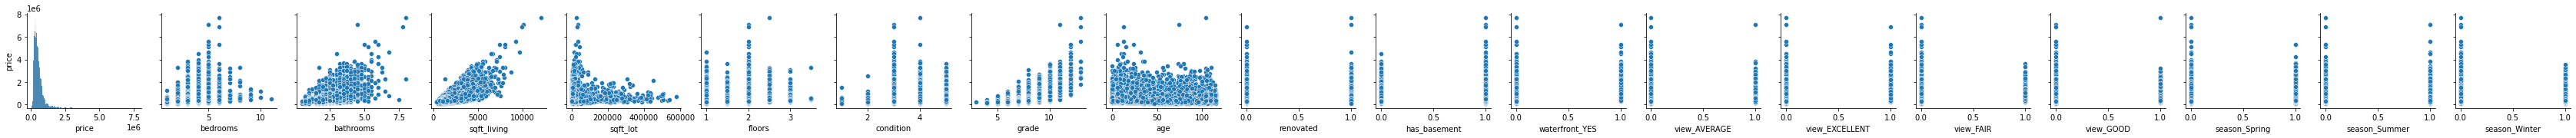

In [54]:
# Visualizing how each variable distributes? with price
sns.pairplot(house_df, y_vars='price');

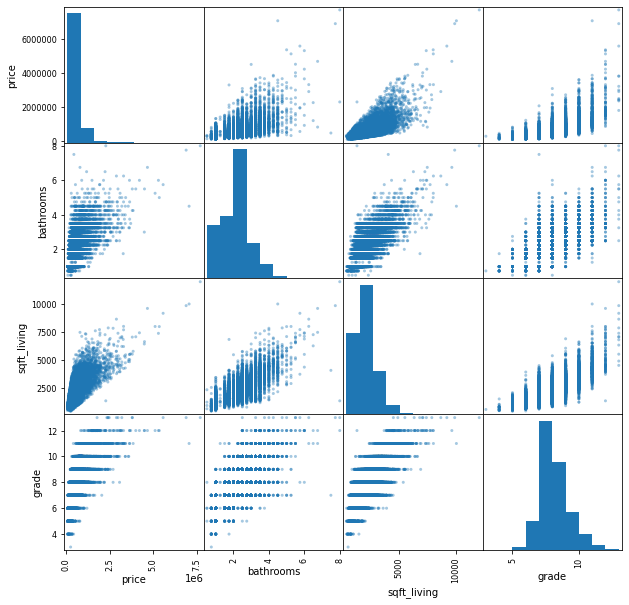

In [55]:
# A further look at certain attributes
attributes = ['price', 'bathrooms', 'sqft_living', 'grade']

pd.plotting.scatter_matrix(house_df[attributes], figsize = [10, 10], alpha=0.4);
plt.show()

we dont notice any problems with multicollinearity

In [56]:
house_df.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,age,renovated,has_basement,waterfront_YES,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,season_Spring,season_Summer,season_Winter
0,221900.0,3,1.00,1180,5650,1.0,3,7,59,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,3,7,63,1,1,0,0,0,0,0,0,0,1
2,180000.0,2,1.00,770,10000,1.0,3,6,82,0,0,0,0,0,0,0,0,0,1
3,604000.0,4,3.00,1960,5000,1.0,5,7,49,0,1,0,0,0,0,0,0,0,1
4,510000.0,3,2.00,1680,8080,1.0,3,8,28,0,0,0,0,0,0,0,0,0,1


### Exploratory Data Analysis

This section will be the exploratory data analysis question where we will exploring and seeing the relationship that price has with other columns.

### What is the relationship between price and number of bedrooms, bathrooms and floors ?

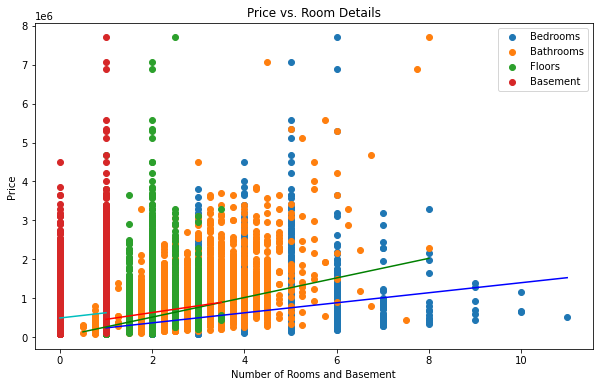

In [57]:
from mpl_toolkits.mplot3d import Axes3D

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the scatter plot for each column
ax.scatter(house_df['bedrooms'], house_df['price'], label='Bedrooms')
ax.scatter(house_df['bathrooms'], house_df['price'], label='Bathrooms')
ax.scatter(house_df['floors'], house_df['price'], label='Floors')
ax.scatter(house_df['has_basement'], house_df['price'], label='Basement')

# Add labels and legend
ax.set_xlabel('Number of Rooms and Basement')
ax.set_ylabel('Price')
ax.set_title('Price vs. Room Details')
ax.legend()

# Add trend lines
for col, color in zip(['bedrooms', 'bathrooms', 'floors', 'has_basement'], ['b', 'g', 'r', 'c']):
    # Fit a polynomial function of degree 1 to the data
    z = np.polyfit(house_df[col], house_df['price'], 1)
    p = np.poly1d(z)
    
    # Create an array of x values
    x_vals = np.array([house_df[col].min(), house_df[col].max()])
    
    # Calculate the corresponding y values and plot the line
    y_vals = p(x_vals)
    ax.plot(x_vals, y_vals, '-', label=f'{col} Trend', color=color)

# Display the plot
plt.show()

In [58]:
# categorical_features = house_df.select_dtypes("object").columns
# fig, axes = plt.subplots(ncols=len(categorical_features), figsize=(12,5))

# for index, feature in enumerate(categorical_features):
#     house_df.groupby(feature).mean().plot.bar(
#         y="price", ax=axes[index])

### What is the relationship between price and grade,condition?

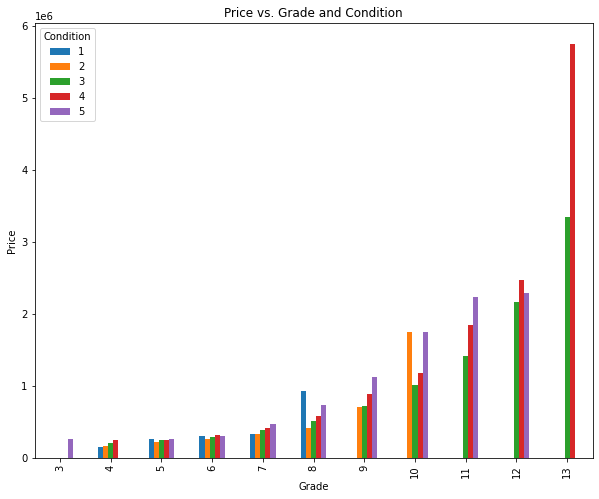

In [66]:
# Create a pivot table to calculate mean price for each grade and condition combination
pivot_table = pd.pivot_table(house_df, values='price', index='grade', columns='condition', aggfunc=np.mean)

# Plot the pivot table as a bar plot
ax = pivot_table.plot(kind='bar', figsize=(10, 8))

# Add labels and legend
ax.set_xlabel('Grade')
ax.set_ylabel('Price')
ax.set_title('Price vs. Grade and Condition')
ax.legend(title='Condition')

# Display the plot
plt.show()

### What is the relationship between price and grade?

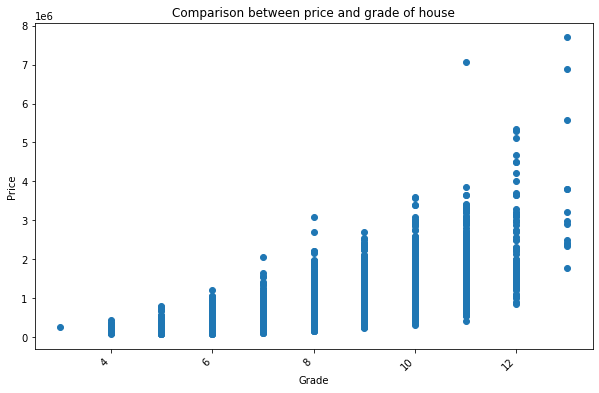

In [59]:
fig = plt.figure(figsize=(10, 6))

plt.scatter(house_df['grade'], house_df['price'])
plt.title('Comparison between price and grade of house')
plt.xlabel('Grade')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Price')
plt.show()

### What is the relationship between price and renovated?

No handles with labels found to put in legend.


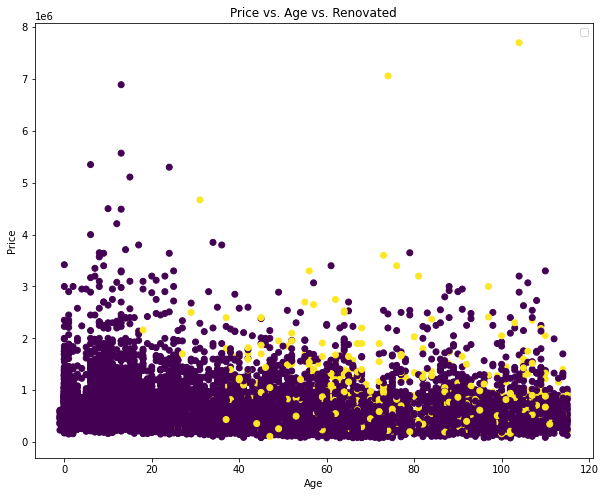

In [60]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.scatter(house_df['age'], house_df['price'], c=house_df['renovated'])
ax.set_xlabel('Age')
ax.set_ylabel('Price')
ax.legend()
ax.set_title('Price vs. Age vs. Renovated')

plt.show()

### What is the relationship between price and season?

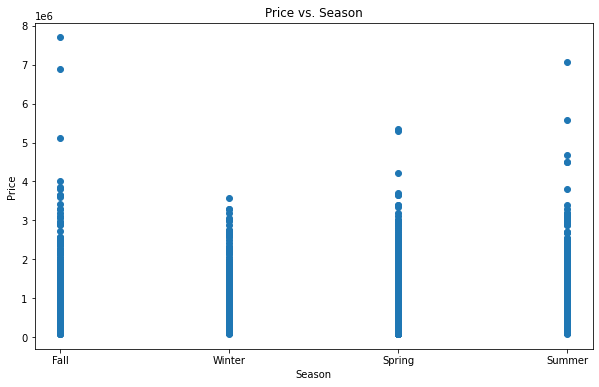

In [63]:
# create a scatter plot

fig = plt.figure(figsize=(10, 6))
plt.scatter(season, house_df['price'])

# add labels and title
plt.xlabel('Season')
plt.ylabel('Price')
plt.title('Price vs. Season')

# show the plot
plt.show()

In [ ]:
categorical_features = house_df.select_dtypes("object").columns
categorical_features = categorical_features.insert(0,season)
fig, axes = plt.subplots(ncols=len(categorical_features), figsize=(12,5))

for index, feature in enumerate(categorical_features):
    house_df.groupby(feature).mean().plot.bar(
        y="price", ax=axes[index])

# MODELLING

Regression is, in my opinion, the finest algorithm to try in this experiment. Based on the values of the independent variables, regression is a supervised learning process used to forecast the value of a dependent variable. In this instance, we're attempting to estimate the impact that various property characteristics have on our dependent variable, the homes' prices. As a result, we will be able to offer our stakeholders a model that can foretell the key characteristics of homes that will have the most effects on their prices.

We will also use multiple linear regression because we are working with numerous features. Contrary to linear regression, which only employs one independent variable, multiple linear regression uses the values of many independent variables to predict the value of a dependent variable. 



### Baseline Model

We will first start by building a baseline model. The baseline model will be used to compare the performance of the other models that we will be building. After that, we will build our multiple linear regression model.

The target variable is price. Therefore, we look at the correlation coefficients for all of the predictor variables to find the one with the highest correlation with price.

In [ ]:
corr = house_df.corr()['price'].sort_values(ascending=False)
corr

We can see that the 'price' column and the'sqft_living' column have the strongest association. This is understandable given that a large portion of a house's price is determined by its size. In order to see the relationship between "sqft_living" and "price," we will also make a scatter plot.


In [ ]:
# Plot a scatter plot of the 'price' column against the 'sqft_living' column
plt.figure(figsize=(10, 5))
plt.scatter(house_df['sqft_living'], house_df['price'], color='b', alpha=0.7, s=10)
plt.title('Price vs Living Space')
plt.xlabel('Living Space (sqft)')
plt.ylabel('Price');

We may now declare the variables y and X_baseline, where y is a Series with pricing data and X_baseline is a DataFrame with the column with the highest correlation ('sqft_living').


In [ ]:
y = house_df['price']

X_baseline = house_df[['sqft_living']]

we'll use our variables to build and fit a simple linear regression model

In [ ]:
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

**lets evaluate the model**

In [ ]:
print(baseline_results.summary())

**lets interpret the results**

In [ ]:
baseline_results.rsquared

R-squared: This represents the proportion of the variance in the target variable (price) that can be explained by the independent variable (sqft_living). Here, R-squared is 0.443, which means that approximately 44.3% of the variance in housing prices can be explained by the square footage of the living area.

In [ ]:
baseline_results.f_pvalue

The p-value of the f-statistic is extremely small (p < 0.001), indicating that the regression model is significant overall and that the independent variable (sqft_living) is a good predictor of the dependent variable (price). 

In [ ]:
baseline_results.pvalues

the p-value for the sqft_living and const coefficients is 4.237554e-13 and 0.000000e+00 respectively are well below the significance level, indicating that they are both statistically significant.



In [ ]:
baseline_results.params

In this case, we have one independent variable, so we have one coefficient, which is 240.9939. This means that for each one-unit increase in square footage of the living area, the housing price increases by $240.99, holding other variables constant.

the estimated intercept value is $29,880. However, since in the context of the problem, the independent variable (sqft_living) cannot be zero, this interpretation is not particularly useful.

Confidence Intervals: These show the range within which we can be 95% confident that the true coefficient lies. Here, we can be 95% confident that the true coefficient for sqft_living is between 237.351 and 244.637.

### We can plot the regression line on top of the scatter plot earlier to see how well the model fits the data.

In [ ]:
# Plot a scatter plot of the 'price' column against the 'sqft_living' column
plt.figure(figsize=(10, 5))

# Plot the regression line of the baseline model
x = np.linspace(house_df.sqft_living.min(), house_df.sqft_living.max(), 100)
Y_predicted = baseline_results.params[0] + baseline_results.params[1] * x

plt.plot(x, Y_predicted, color='black', label='Regression Line')

plt.scatter(X_baseline, y, color='lightgreen', alpha=0.7, s=10, edgecolors='black')
plt.title('Price vs Living Space (Baseline Model)')
plt.xlabel('Living Space (sqft)')
plt.ylabel('Price (\$)')
plt.legend();

### Calculate the mean absolute error of the baseline model

In [ ]:
baseline_mae = mean_absolute_error(y, baseline_results.predict(sm.add_constant(X_baseline)))
baseline_mae

This means that on average, the model's predictions for the price of a house are off by about $159,750. 

This is a relatively large error, considering that the average price of a house in the dataset is around $540,000. Therefore, the model's predictions may not be very accurate and may need to be improved by either selecting additional features or by trying a different type of model.

## Build Iterated Multiple Linear Regression Model

We will now iterate the baseline model by building a multiple linear regression model that will have more than one independent variable.

**We will start by creating a new dataframe that will contain all of the features that we want to have in our model.**

In [ ]:
house_df.columns

In [ ]:
X_iterated = house_df.drop(columns='price')
X_iterated.columns

**We will now build our multiple linear regression model.**

In [ ]:
iterated_model = sm.OLS(y, sm.add_constant(X_iterated))
iterated_results = iterated_model.fit()

**lets evaluate the model**

In [ ]:
print(iterated_results.summary())

**lets interpret the results**

First, we can see that the R-squared value for this model is 0.634, which means that the model explains about 63.4% of the variance in the target variable (price). This is a significant improvement over the previous model which had an R-squared value of   0.443.

The F-statistic of 2036 and the corresponding p-value of 0.00 indicate that the overall model is statistically significant, meaning that at least one of the independent variables in the model is significantly related to the target variable.

The constant term (const) in this model is -994,600. This represents the predicted price of a house with all independent variables set to zero (which is not realistic for most variables).


**Now let's examine the feature coefficients.**

Each coefficient represents the change in the target variable associated with a one-unit change in the corresponding independent variable, holding all other variables constant.

The coefficient for the bedrooms variable is -26,120, which means that for each additional bedroom, the predicted price of the house decreases by \\$26,120, holding all other variables constant.

The coefficient for the bathrooms variable is \\$36,100, which means that for each additional bathroom, the predicted price of the house increases by \\$36,100, holding all other variables constant.

The coefficient for the square footage of the living area (sqft_living) is 123.8, which means that for each additional square foot of living area, the predicted price of the house increases by \\$123.80, holding all other variables constant.

The coefficient for the square footage of the lot (sqft_lot) is -0.0885, which means that for each additional square foot of lot size, the predicted price of the house decreases by $0.0885, holding all other variables constant.

The coefficient for the floors variable is \\$39,150, which means that for each additional floor, the predicted price of the house increases by \\$39,150, holding all other variables constant.

The coefficient for the condition variable is \\$21,030, which means that for each unit increase in the condition rating (on a scale of 1-5), the predicted price of the house increases by \\$21,030, holding all other variables constant.

The coefficient for the grade variable is \\$128,000, which means that for each unit increase in the grade rating (on a scale of 1-13), the predicted price of the house increases by \\$128,000, holding all other variables constant.

The coefficient for the age variable is \\$3,264.43, which means that for each additional year of age of the house, the predicted price of the house increases by \\$3,264.43, holding all other variables constant.

The coefficient for the renovated variable is \\$25,880, which means that if the house has been renovated, the predicted price of the house increases by \\$25,880, holding all other variables constant.

The coefficient for the has_basement variable is \\$16,810, which means that if the house has a basement, the predicted price of the house increases by \\$16,810, holding all other variables constant.

The coefficient for the waterfront_YES variable is \\$236,700, which means that if the house has a waterfront view, the predicted price of the house increases by \\$236,700 compared to waterfront_NO (which was the reference waterfront).

The coefficients for the view variables (view_AVERAGE, view_EXCELLENT, view_FAIR, and view_GOOD) represent the additional price associated with each respective view rating, holding all other variables constant.The coefficients for  all 'view' categories are positive, indicating that homes  better view ratings tend to have higher prices compared to view_NONE (which was the reference view)

The coefficient for 'season_Spring' is also positive, indicating that homes tend to sell for higher prices during spring compared to fall (which was the reference season). On the other hand, the coefficients for 'season_Summer' and 'season_Winter' are not statistically significant, indicating that there is no evidence that homes sell for higher prices in summer or winter compared to fall.

We can also see that some variables have a stronger effect than others. For example, the coefficient for the waterfront view variable is much larger than the coefficients for the other variables, indicating that having a waterfront view is a very significant factor in determining the price of a house.

Overall, this model provides a more comprehensive understanding of the factors that affect the price of a house, and can be used to make more accurate predictions of house prices based on the characteristics of the house.

**RMSE measure of how well the model is able to predict the outcome variable**

In [ ]:
rmse = ((iterated_results.resid ** 2).sum() / len(y)) ** 0.5
rmse

For this specific RMSE value, it means that our model is off by about 181k us dollars in a given prediction.

# Conclusion

In this phase we will be interpreting the model results and limitations in the context of the business problem and giving reccomendations to the stakeholder based on our modeling results.

### Recommendations

Taking this analysis back to the original business problem, the aim was to help a real estate agency advise their clients on the best possible potential renovations to make to increase the the value. After modelling the data, we can see that the best renovations are as follows:

- Moving the house closer to the water. This will increase the value of the house by about \$540,924. As a result this most likely means that it make the view excellent as the two features are fairly correlated. In turn, by making the view excellent, the value of the house will increase by about \$340,899. However, this renovation can only be made if land is close water.

- The second best renovation to make is to improve the grade of the house. This will increase the value of the house by about \$205,092 for every grade.

- The third best renovation to make is to increase the number of floors in the house. This will increase the value of the house by about \$78,262 for every floor. However, it is worth mentioning that our data only had 3.5 floors as the maximum. Therefore, it is unlikely that this statistic would apply to a house with more than 3.5 floors.

- Increasing the number of bedrooms in the house will increase the value of the house by about \$16,240 for every bedroom. However, it is worth mentioning that our data only had 10 bedrooms as the maximum. Therefore, it is unlikely that this statistic would apply to a house with more than 10 bedrooms.

- Lastly, increasing the size of the basement will increase the value of the house by about \$119 for every square foot. However, it is worth mentioning that our data only had 4,820 square feet as the maximum. Therefore, it is unlikely that this statistic would apply to a house with more than 4,820 square feet.


### Limitations

Though our model did show a significant increase in the accuracy of the model, there are still some limitations to the model. These limitations are as follows:

- The data in the dataset is from 2014 and 2015. Therefore, it may not be able to account for changes in the housing market since then. As a result the model may not be able to predict the value of a house in 2022. 

- In order to improve the value of a house, we would need to understand the market (i.e. what buyers are looking for). Therefore, by not having this information, we are unable to advise our clients on the best renovations to make. It is possible to build the most expensive house in the world, but if it is not what buyers are looking for, then it will not be sold. There is no value in that.

- By using a correlation threshold of 0.6, we may have ignored dropping some freatures with a high correlation. This may have led to multicollinearity in the model. As a result, the model may not be able to predict the value of a house accurately.

## Recommendations

Bathrooms: The number of bathrooms has a positive effect on the price of the house, meaning that houses with more bathrooms tend to be priced higher. The agency may want to consider this factor when pricing and marketing homes with more bathrooms.

Living Area and Lot Size: The size of the living area has a positive effect on the price of the house, while the size of the lot has a negative effect. The agency may want to consider emphasizing the living area in their marketing efforts, while also being mindful of the lot size.

Floors: Houses with more floors tend to be priced higher. The agency may want to consider this factor when pricing and marketing multi-story homes.

Condition and Grade: Houses with higher condition and grade ratings tend to be priced higher. The agency may want to emphasize these ratings in their marketing efforts and pricing strategy.

Age and Renovated: The age of the house and whether or not it has been renovated both have significant effects on the price of the house. The agency may want to consider these factors when pricing and marketing homes, particularly when comparing newer, renovated homes to older ones.

Waterfront View: Houses with a waterfront view are priced significantly higher than those without. The agency may want to emphasize this factor in their marketing efforts for waterfront properties.

Season: The season in which a house is sold can also affect the price, with spring selling for higher prices than fall. The agency may want to consider this factor when planning their marketing and pricing strategies throughout the year.

## Limitations

Some limitations of this model and analysis could include:

Limited variables: While this model includes many important variables that are known to impact house prices, there may be other factors that were not included in the analysis that could also have an effect on house prices.

Assumptions: The model assumes a linear relationship between the independent variables and the target variable. This may not always be the case, and there could be more complex, non-linear relationships between the variables that are not captured in this analysis.

Generalizability: The dataset used for this analysis was limited to a specific geographic area and time period. It may not be representative of other locations or time periods, which could limit the generalizability of the results.The data in the dataset is from 2014 and 2015. Therefore, it may not be able to account for changes in the housing market since then. As a result the model may not be able to predict the value of a house in 2022. 

Causality: While the model can identify relationships between variables, it cannot prove causality. Therefore, it's important to be cautious about making causal claims based solely on the results of this model.

In order to improve the value of a house, we would need to understand the market (i.e. what buyers are looking for). Therefore, by not having this information, we are unable to advise our clients on the best renovations to make. It is possible to build the most expensive house in the world, but if it is not what buyers are looking for, then it will not be sold. There is no value in that.